# Metropolis-Hastings sampling

- Use Q(x->x') Transition probability as Normal(center=x,scale=1) ==> Q(x->x')=Q(x'->x) 
- $\pi$ is Gaussian mixture (Desired distribution)

<img src="../../img/Metropolis01.png"/>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from lib.bayesian1Dmd import *
from lib.plotmd import plotDistribution

In [2]:
def sampleMetropolis(dist,start,num_samples):
    samples=[start]
    trajectory=[]
    counter=0
    while counter<num_samples:
        x=samples[-1]
        trajectory.append(x)
        newx=np.random.normal(x,10)
        densities=dist.getDensities(np.array([x,newx]))
        p=min(1,densities[1]/densities[0])
        accept= np.random.uniform()

        if accept<=p:
            samples.append(newx)
            counter+=1
    return samples,trajectory

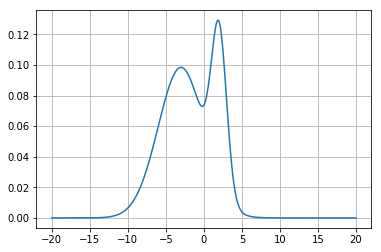

In [3]:
# want to sample from the following distribution
MM=2
# upper bound Gaussian
Mu1,S1=1,6
# Mixture parameters
Mu21,S21=-3,3
Mu22,S22=2,1

numPoints=10000000
dist=GMixtureM(-20,20,0.001)
dist.addGausian(M=Mu21,S=S21,weight=0.74)
dist.addGausian(M=Mu22,S=S22,weight=0.26)
plt.plot(dist.domain,dist.getDist())
plt.grid()

11 samples accepted and 11 samples rejected, total 22
correlation: 0.529663230327018


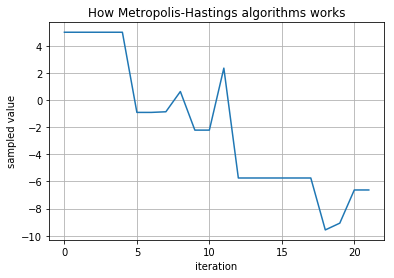

In [4]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=10)

corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plt.figure()
plt.title("How Metropolis-Hastings algorithms works")
plt.plot(trajectory)
plt.xlabel("iteration")
plt.ylabel("sampled value")
plt.grid()

1001 samples accepted and 1594 samples rejected, total 2595
correlation: 0.18362368980759664


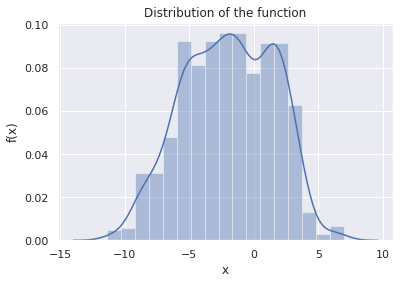

In [5]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=1000)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")

10001 samples accepted and 16202 samples rejected, total 26203
correlation: 0.15803807340180595


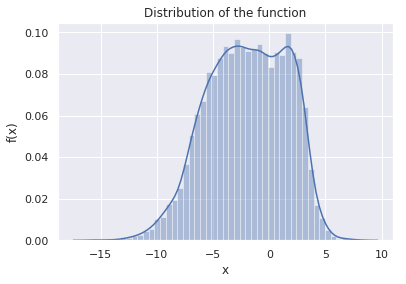

In [6]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=10000)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")

100001 samples accepted and 163772 samples rejected, total 263773
correlation: 0.17001015524820898


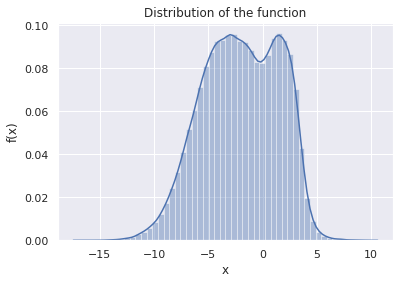

In [7]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=100000)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")